In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Verisetinin Hazırlanması

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/kaggle/input/depression-dataset/depression_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [4]:
import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [5]:
df.columns #Pandas'ta bir veri çerçevesinin sütun etiketlerine erişim sağlayan bir özniteliktir.
           #DataFrame'deki sütunların adlarını temsil eden bir Index döndürür.

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [6]:
df.shape

(413768, 16)

In [7]:
df.dtypes

Name                             object
Age                               int64
Marital Status                   object
Education Level                  object
Number of Children                int64
Smoking Status                   object
Physical Activity Level          object
Employment Status                object
Income                          float64
Alcohol Consumption              object
Dietary Habits                   object
Sleep Patterns                   object
History of Mental Illness        object
History of Substance Abuse       object
Family History of Depression     object
Chronic Medical Conditions       object
dtype: object

In [8]:
df.head(10)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [9]:
df.tail(10) #Veri setinin varsayılan olarak son 5 satırını getirebilirdik fakan biz df.tail(10) ile son 10 satıra baktık.

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413758,Brian Jacobs,61,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,16867.23,Low,Moderate,Fair,No,Yes,Yes,No
413759,Travis Brewer,20,Single,Bachelor's Degree,0,Current,Sedentary,Employed,54483.50,Moderate,Unhealthy,Good,No,No,No,No
413760,Sophia Allen,46,Married,High School,1,Non-smoker,Sedentary,Employed,26153.32,Low,Unhealthy,Poor,Yes,No,No,Yes
413761,Marissa Wright,48,Married,Master's Degree,3,Non-smoker,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes
413762,Janice Robertson,28,Single,Bachelor's Degree,0,Non-smoker,Active,Unemployed,5971.27,Moderate,Moderate,Fair,Yes,Yes,No,No
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62,Widowed,Master's Degree,0,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


# 2. Veri analizi

In [10]:
df.describe().T
#count: Sütundaki non-null (boş olmayan) değerlerin sayısı.
#mean: Sütundaki değerlerin ortalaması.
#std: Sütundaki değerlerin standart sapması.
#min: Sütundaki en küçük değer.
#25%: Alt çeyrek yüzdesi, sütundaki değerlerin %25'inin altında olan değer.
#50%: Medyan veya ortanca, sütundaki değerlerin yarısından küçük ve yarısından büyük olan değer.
#75%: Üst çeyrek yüzdesi, sütundaki değerlerin %75'inin altında olan değer.
#max: Sütundaki en büyük değer.

,count,mean,std,min,25%,50%,75%,max
Age,413768.0,49.000713,18.158759,18.00,33.00,49.000,65.0,80.00
Number of Children,413768.0,1.298972,1.237054,0.00,0.00,1.000,2.0,4.00
Income,413768.0,50661.707971,40624.100565,0.41,21001.03,37520.135,76616.3,209995.22


In [11]:
#Bir veri kümesindeki kategorik ve sayısal değişkenleri ayırın

categorical_features = [col for col in df.columns if df[col].dtype == "object" or df[col].dtype == "category"]
numerical_features = [col for col in df.columns if df[col].dtype != "object" and df[col].dtype != "category"]

In [12]:
categorical_features, numerical_features

(['Name',
  'Marital Status',
  'Education Level',
  'Smoking Status',
  'Physical Activity Level',
  'Employment Status',
  'Alcohol Consumption',
  'Dietary Habits',
  'Sleep Patterns',
  'History of Mental Illness',
  'History of Substance Abuse',
  'Family History of Depression',
  'Chronic Medical Conditions'],
 ['Age', 'Number of Children', 'Income'])

In [13]:
def plot_hist(variable):
    plt.figure(figsize = (9,5)) #x ekseni için 9 birim ve yükseklik y ekseni için 5 birim belirledik.
    plt.hist(df[variable], bins = 10) # histogramı 10 eşit aralığa bolduk.
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Hist Dagilimi".format(variable))
    plt.show()

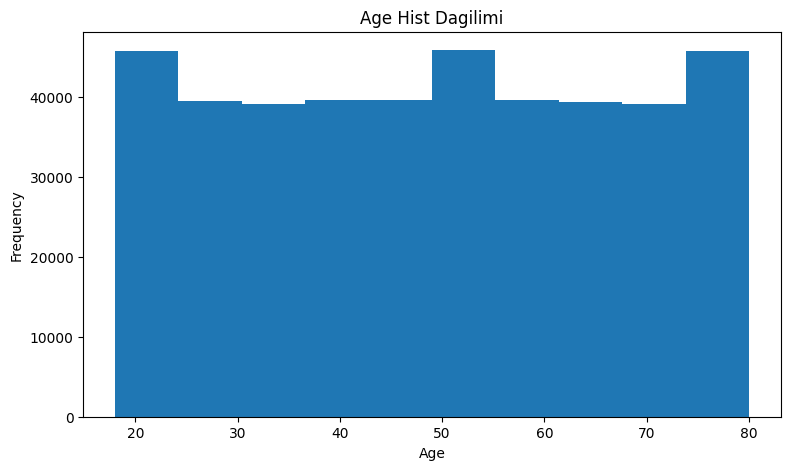

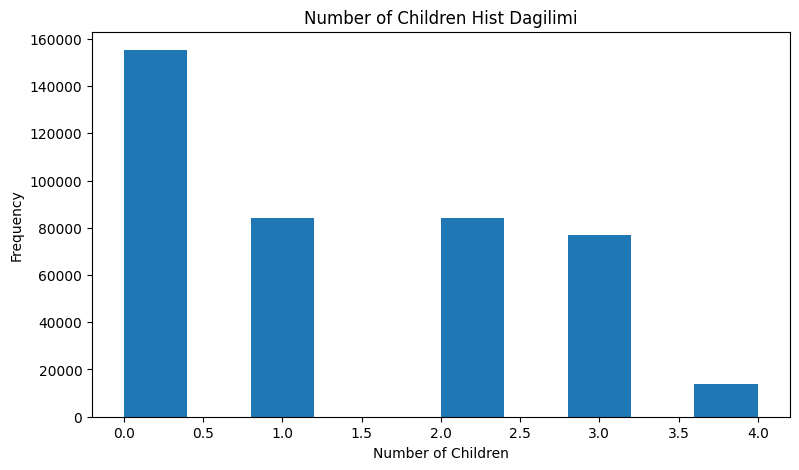

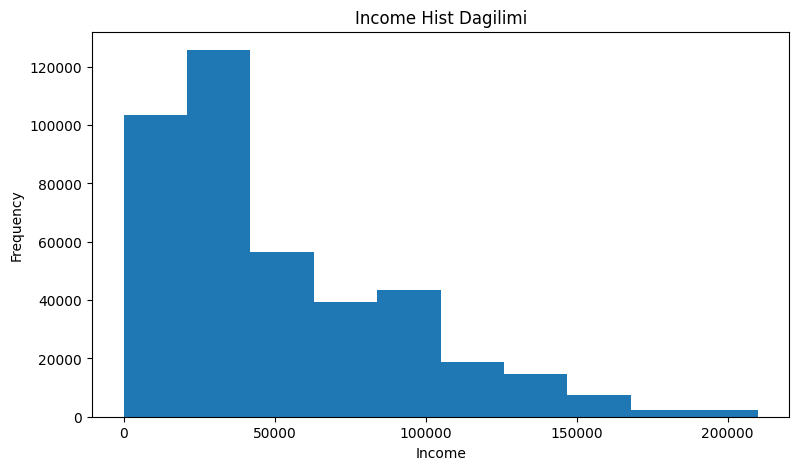

In [14]:
numericVar = ["Age", "Number of Children", "Income"]
for n in numericVar:
    plot_hist(n)
    #Toplam Kutuphane Genisligi, TV Gosteri Sayisi ve  Film Sayisi için histogram grafiği çizelim.

In [15]:
df.columns[df.isnull().any()] #Eksik deger olup olmadigini kontrol edecegiz.


Index([], dtype='object')

In [16]:
df.isnull().sum() #Eksik deger olup olmadigini tespit ediyoruz.


Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [17]:
df.Age.unique()  # veri setinde hangi yaşların yer aldığını gorelim.


array([31, 55, 78, 58, 18, 20, 60, 50, 77, 70, 59, 33, 66, 38, 25, 32, 52,
       49, 28, 56, 37, 27, 69, 46, 67, 22, 26, 72, 34, 53, 44, 62, 51, 23,
       24, 35, 61, 65, 63, 73, 71, 76, 43, 54, 40, 39, 21, 19, 64, 36, 30,
       45, 80, 41, 48, 42, 68, 75, 57, 47, 79, 74, 29])

In [18]:
df_copy = add_random_missing_values(dataframe=df, missing_rate=0.04)

In [19]:
df_copy.isnull().sum()

Name                            16237
Age                             16325
Marital Status                  16131
Education Level                 16670
Number of Children              16067
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                          16106
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [20]:
df_copy.isnull().sum().sum()

259655

In [21]:
df_copy.notnull().sum()

Name                            397531
Age                             397443
Marital Status                  397637
Education Level                 397098
Number of Children              397701
Smoking Status                  397609
Physical Activity Level         397658
Employment Status               397516
Income                          397662
Alcohol Consumption             397476
Dietary Habits                  397505
Sleep Patterns                  397717
History of Mental Illness       397605
History of Substance Abuse      397547
Family History of Depression    397504
Chronic Medical Conditions      397424
dtype: int64

In [22]:
# Toplam eksik veriler
df_copy.notnull().sum().sum()

6360633

In [23]:
# En az 1 sütunda NaN değeri olan satırları görüntüle
df_copy[df_copy.isnull().any(axis = 1)]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
1,Jacqueline Lewis,55.0,NaN,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,NaN,No,No,No,No
5,Kathy Hill,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,NaN,No,No
7,Charles Kaiser,31.0,Single,High School,0.0,Non-smoker,NaN,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,NaN,NaN,Bachelor's Degree,0.0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413758,Brian Jacobs,61.0,Married,Associate Degree,2.0,Non-smoker,Sedentary,Unemployed,NaN,NaN,Moderate,Fair,No,Yes,Yes,No
413760,Sophia Allen,46.0,Married,NaN,1.0,Non-smoker,Sedentary,Employed,26153.32,Low,Unhealthy,Poor,Yes,No,No,Yes
413761,Marissa Wright,48.0,Married,Master's Degree,3.0,Non-smoker,Moderate,NaN,130842.60,Low,Healthy,Poor,No,No,No,Yes
413765,Matthew Jenkins,57.0,NaN,Bachelor's Degree,0.0,Non-smoker,Sedentary,NaN,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes


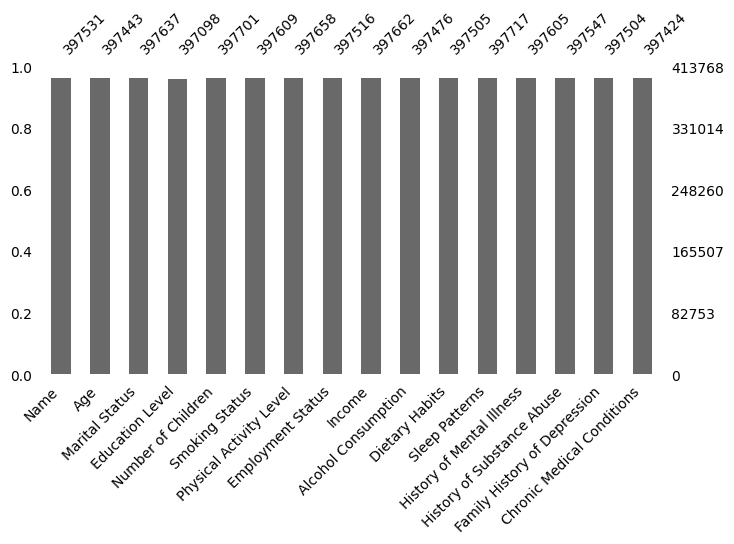

In [24]:
import missingno as msno
# her sütundaki boş olmayan değerlerin toplam sayısının ve kayıp yüzdesine göre oluşacak NaN değerlerinin sayısının görseli
msno.bar(df = df_copy,
         figsize = (8, 4),
         fontsize = 10);

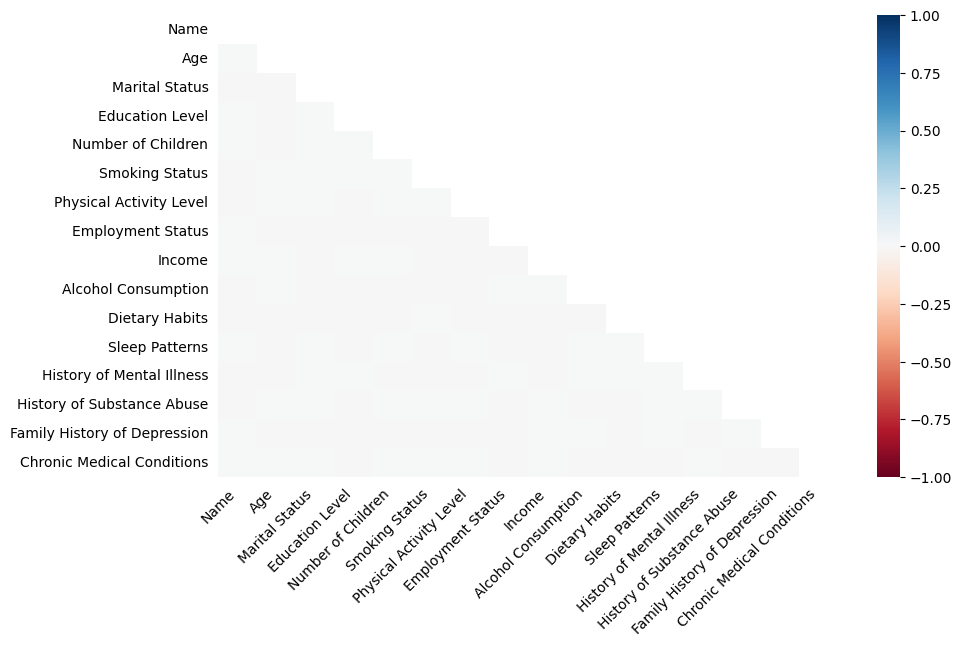

In [25]:
# Eksik verilerin korelasyonları
# 1'e yakın değerler, iki sütunun eksik değerlerinin benzer desenlere sahip olduğunu gösterir.
# -1'e yakın değerler, eksik değerlerin karşılıklı olarak birbirini dışladığını gösterir.
# 0, korelasyon olmadığını gösterir.
msno.heatmap(df = df_copy,
             figsize = (10, 6),
             fontsize = 10);

# 3. Eksik Nümerik Değerleri Doldurma


In [26]:
numerical_features


['Age', 'Number of Children', 'Income']

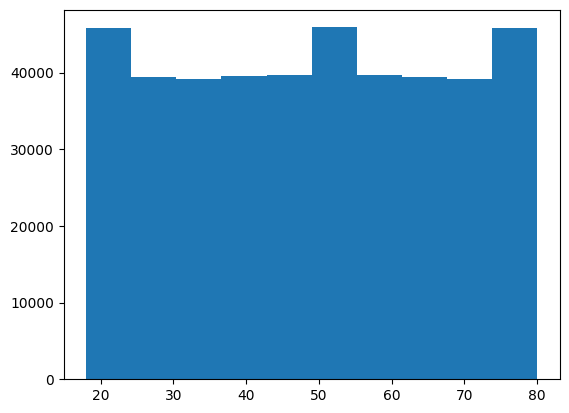

In [27]:
plt.hist(df['Age'])
plt.show()

In [28]:
data = pd.DataFrame(df_copy)

In [29]:
from sklearn.impute import KNNImputer
# KNN en yakın komşularına göre ortalama bir değer oluşturur ve boş kalan değeri onunla doldurur.
imputer = KNNImputer(n_neighbors=5)
data[['Age']] = imputer.fit_transform(data[['Age']])

In [30]:
data.isnull().sum()

Name                            16237
Age                                 0
Marital Status                  16131
Education Level                 16670
Number of Children              16067
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                          16106
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

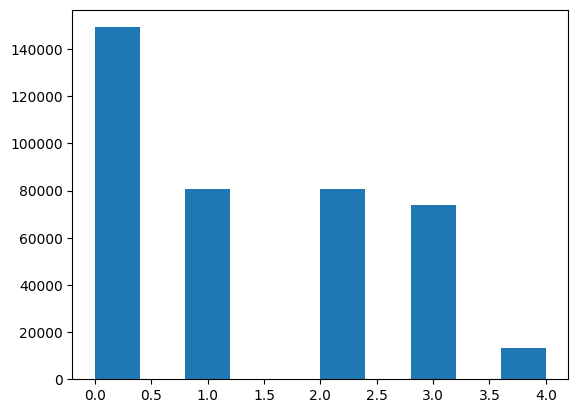

In [31]:
plt.hist(df_copy['Number of Children'])
plt.show()

In [32]:
imputer = KNNImputer(n_neighbors=6)
data[['Number of Children']] = imputer.fit_transform(data[['Number of Children']])

In [33]:
data.isnull().sum()

Name                            16237
Age                                 0
Marital Status                  16131
Education Level                 16670
Number of Children                  0
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                          16106
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

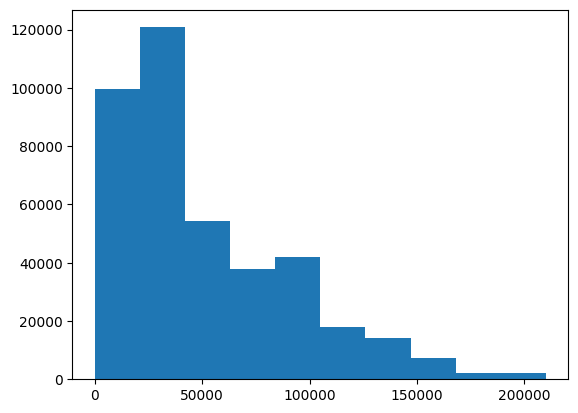

In [34]:
plt.hist(df_copy['Income'])
plt.show()

In [35]:
median_income = df_copy['Income'].median()
median_income

37512.729999999996

In [36]:
data['Income'] = data['Income'].fillna(median_income)

In [37]:
data.isnull().sum()

Name                            16237
Age                                 0
Marital Status                  16131
Education Level                 16670
Number of Children                  0
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

 # 4. Eksik Kategorik Değişkenlerin Doldurulması

In [38]:
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,NaN,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,NaN,No,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [39]:
categorical_features

['Name',
 'Marital Status',
 'Education Level',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions']

In [40]:
data['Name'].fillna('Bilinmiyor', inplace=True)

In [41]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                  16131
Education Level                 16670
Number of Children                  0
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Non-missing data
train_data = data[data['Marital Status'].notna()]

X = train_data[['Number of Children']]  
y = train_data['Marital Status']

model = RandomForestClassifier()
model.fit(X, y)

# Missing data
test_data = data[data['Marital Status'].isna()]

# Where data is filled in by making predictions
data.loc[data['Marital Status'].isna(), 'Marital Status'] = model.predict(test_data[['Number of Children']])

In [43]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                 16670
Number of Children                  0
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [44]:
train_data = data[data['Education Level'].notna()]

X = train_data[['Income']]  
y = train_data['Education Level']

model = RandomForestClassifier()
model.fit(X, y)

test_data = data[data['Education Level'].isna()]

data.loc[data['Education Level'].isna(), 'Education Level'] = model.predict(test_data[['Income']])

Eğitim düzeyi ile gelir arasında bir ilişki olduğu göz önüne alınırsa

In [45]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  16159
Physical Activity Level         16110
Employment Status               16252
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [46]:
train_data = data[data['Physical Activity Level'].notna()]

X = train_data[['Age']]  
y = train_data['Physical Activity Level']

model = RandomForestClassifier()
model.fit(X, y)

test_data = data[data['Physical Activity Level'].isna()]

data.loc[data['Physical Activity Level'].isna(), 'Physical Activity Level'] = model.predict(test_data[['Age']])

In [47]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  16159
Physical Activity Level             0
Employment Status               16252
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [48]:
train_data = data[data['Employment Status'].notna()]

X = train_data[['Age']]  
y = train_data['Employment Status']

model = RandomForestClassifier()
model.fit(X, y)

test_data = data[data['Employment Status'].isna()]

data.loc[data['Employment Status'].isna(), 'Employment Status'] = model.predict(test_data[['Age']])

In [49]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  16159
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                  16051
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [50]:
train_data = data[data['Sleep Patterns'].notna()]

X = train_data[['Age']]  
y = train_data['Sleep Patterns']

model = RandomForestClassifier()
model.fit(X, y)

test_data = data[data['Sleep Patterns'].isna()]

data.loc[data['Sleep Patterns'].isna(), 'Sleep Patterns'] = model.predict(test_data[['Age']])

In [51]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  16159
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                      0
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions      16344
dtype: int64

In [52]:
data.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413763,Sean Miller,68.00000,Married,Master's Degree,0.0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26.00000,Single,Bachelor's Degree,0.0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57.00000,Single,Bachelor's Degree,0.0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71.00000,Married,Associate Degree,2.0,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,49.01101,Widowed,Master's Degree,0.0,Former,Sedentary,Employed,107125.74,Moderate,Healthy,Good,No,NaN,No,NaN


Diğer Sütunlar Tahmini değere göre atamalar yapıldı

In [53]:
# Kronik Tıbbi Durumu fiziksel aktivite ve yaşla ilişkilendirildi.
data.loc[(data['Chronic Medical Conditions'].isna()) & (data['Physical Activity Level'] == 'Sedentary'), 'Age'] = 'Yes'

data['Chronic Medical Conditions'].fillna('No', inplace=True)

In [54]:
data.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  16159
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption             16292
Dietary Habits                  16263
Sleep Patterns                      0
History of Mental Illness       16163
History of Substance Abuse      16221
Family History of Depression    16264
Chronic Medical Conditions          0
dtype: int64

In [55]:
# En sık görülen değerle doldurma
data['Smoking Status'].fillna(data['Smoking Status'].mode()[0], inplace=True)

Mevcut dağılım yoğunluğunu her sütunda bozmamak için eksik verileri uygun şekilde yerleştirildi.

In [56]:
for col in ["Dietary Habits","History of Mental Illness", "History of Substance Abuse", "Family History of Depression", "Alcohol Consumption"]:
    probs = data[col].value_counts(normalize=True)  
    data[col] = data[col].apply(lambda x: np.random.choice(probs.index, p=probs.values) if pd.isna(x) else x)

In [57]:
data.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

# 5. Categorical Değişkenlerin Analizi

In [58]:
df_categorical = df.copy()
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [59]:
df_categorical.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [60]:
df_categorical2 = df_categorical.select_dtypes(include = "object")
df_categorical2.head(5)

,Name,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,Married,Bachelor's Degree,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,Married,High School,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,Widowed,Master's Degree,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,Divorced,Master's Degree,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,Single,High School,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes


In [61]:
df_categorical2["Education Level"].unique()


array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [62]:
df_categorical2["Education Level"].value_counts()


Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64

In [63]:
for col in df_categorical2.columns:
    print(f'There are {df_categorical2[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 196851 unique values in "Name" categorical feature.

There are 4 unique values in "Marital Status" categorical feature.

There are 5 unique values in "Education Level" categorical feature.

There are 3 unique values in "Smoking Status" categorical feature.

There are 3 unique values in "Physical Activity Level" categorical feature.

There are 2 unique values in "Employment Status" categorical feature.

There are 3 unique values in "Alcohol Consumption" categorical feature.

There are 3 unique values in "Dietary Habits" categorical feature.

There are 3 unique values in "Sleep Patterns" categorical feature.

There are 2 unique values in "History of Mental Illness" categorical feature.

There are 2 unique values in "History of Substance Abuse" categorical feature.

There are 2 unique values in "Family History of Depression" categorical feature.

There are 2 unique values in "Chronic Medical Conditions" categorical feature.



In [64]:
edu_level = df_categorical["Education Level"].unique().tolist()[:]
edu_level

["Bachelor's Degree",
 'High School',
 "Master's Degree",
 'Associate Degree',
 'PhD']

In [65]:
from pandas.api.types import CategoricalDtype

df_categorical["Education Level"] = df_categorical["Education Level"].astype(CategoricalDtype(categories = edu_level, ordered = True))

In [66]:
df_categorical["Education Level"].head()


0    Bachelor's Degree
1          High School
2      Master's Degree
3      Master's Degree
4          High School
Name: Education Level, dtype: category
Categories (5, object): ['Bachelor's Degree' < 'High School' < 'Master's Degree' < 'Associate Degree' < 'PhD']

# 6. Categorical verilerin Görselleştirme 


<Axes: xlabel='Education Level'>

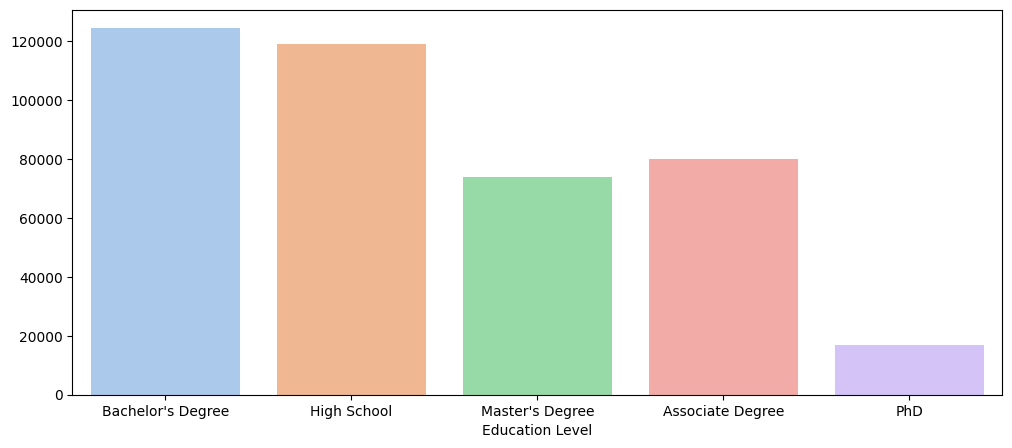

In [67]:
# Veri setindeki kişilerin eğitim düzeyi dağılımı. 
im_1 = df_categorical["Education Level"].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=im_1.index, y=im_1.values, palette='pastel')

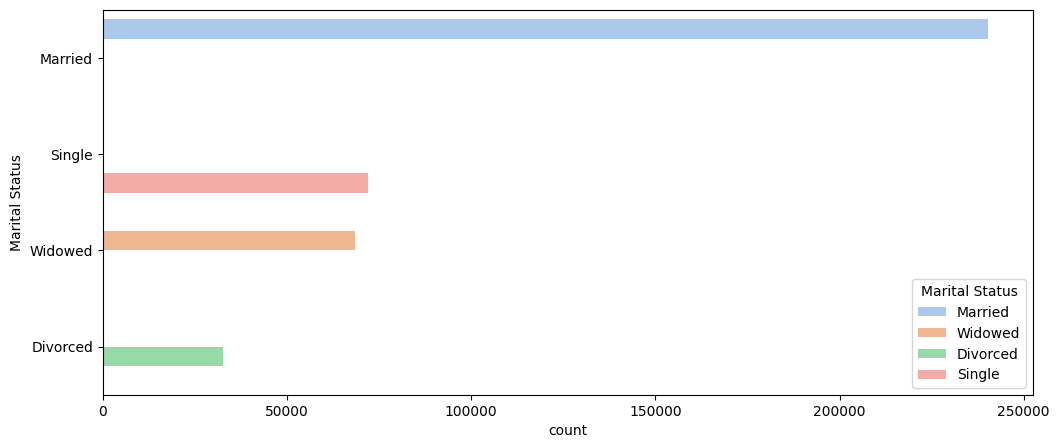

In [68]:
# Veri setindeki kişilerin medeni durumlarının analizi.
df1 = pd.DataFrame(df)
plt.figure(figsize=(12,5))
sns.countplot(data = df1, y = "Marital Status", hue = "Marital Status", order = df1["Marital Status"].value_counts().index,
              palette = "pastel");

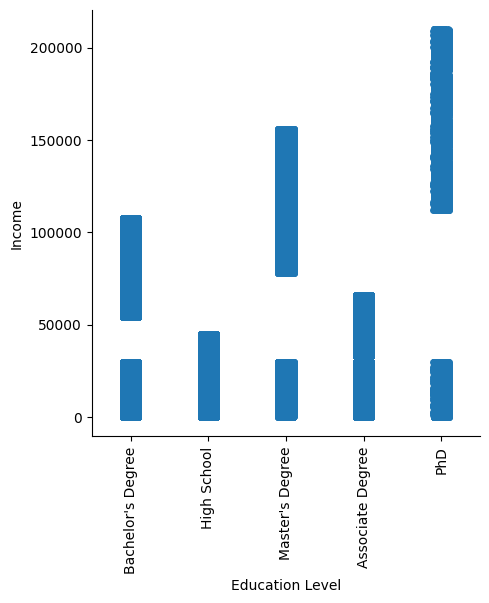

In [69]:
#NaN değerlinin değiştirilmesi
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Eğitim düzeylerine göre gelir dağılımları.
sns.catplot(data=df, x="Education Level", y="Income")
plt.xticks(rotation=90)
plt.show()

Doktora derecesine sahip olanların gelir düzeyinin en yüksek olduğunu, en düşük gelir düzeyinin ise lise mezunları olduğunu gözlemlendi.

In [70]:
# Fiziksel aktivite durumuna göre ortalama yaşlar.
df_inc = df.groupby("Physical Activity Level")["Age"].mean().reset_index()
df_inc

,Physical Activity Level,Age
0,Active,34.037526
1,Moderate,50.278237
2,Sedentary,54.535375


Text(0.5, 1.0, 'Average Ages of Physical Activity Levels')

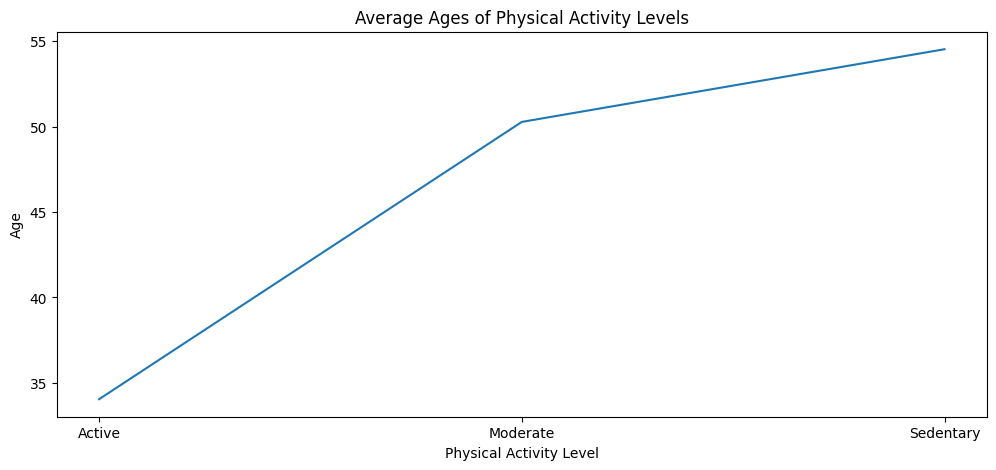

In [71]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Physical Activity Level', y='Age', data=df_inc)
plt.title('Average Ages of Physical Activity Levels')

Bu grafiğe göre, insanların yaşları ilerledikçe hareketlilik oranlarının azaldığı gözlemlendi.

<Axes: xlabel='Marital Status', ylabel='Age'>

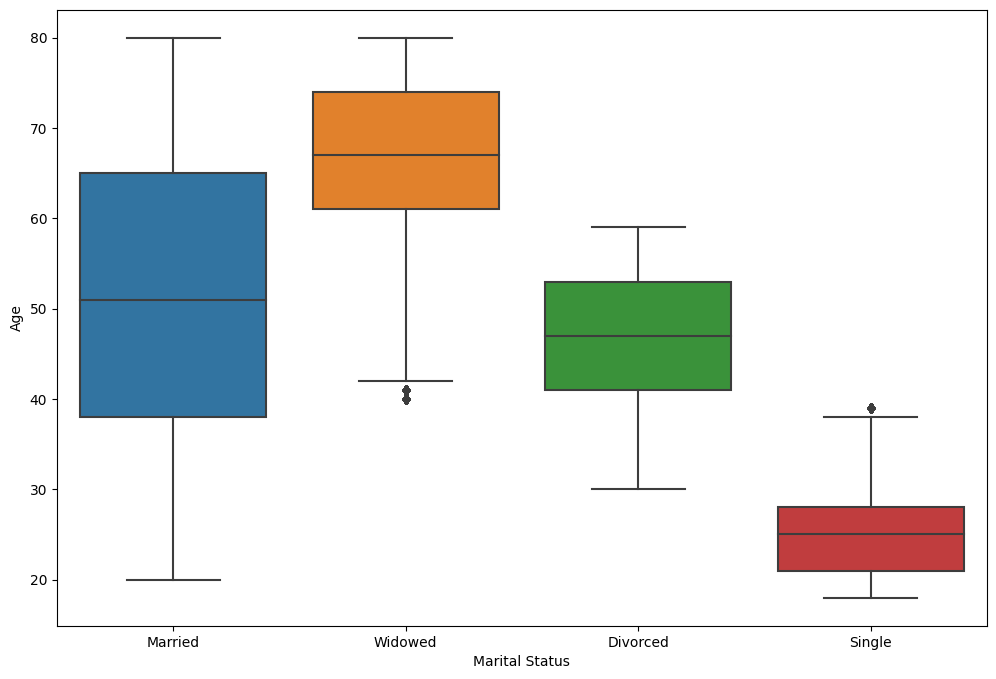

In [72]:
plt.figure(figsize = (12, 8))
sns.boxplot(data=df, x='Marital Status', y='Age')

Bu grafiğe göre evlilerin ortalama 50'li yaşlarda, dulların genelde 60'lı yaşlarda, boşanmışların 40-50 yaş aralığında, bekarların ise ortalama 25 yaşında olduğunu gözlemlendi. Aykırı değerlerde ise hem dulların hem de bekarların 40'lı yaşlarda çok nadir olduğunu gözlemlendi.

# 7. Numerik Değişkenlerin Analizi 

In [73]:
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()


,Age,Number of Children,Income
0,31,2,26265.67
1,55,1,42710.36
2,78,1,125332.79
3,58,3,9992.78
4,18,0,8595.08


In [74]:
df_numerical.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


# 8. Nümerik Değerleri Görselleştirme

Text(0.5, 1.0, 'Income Distribution')

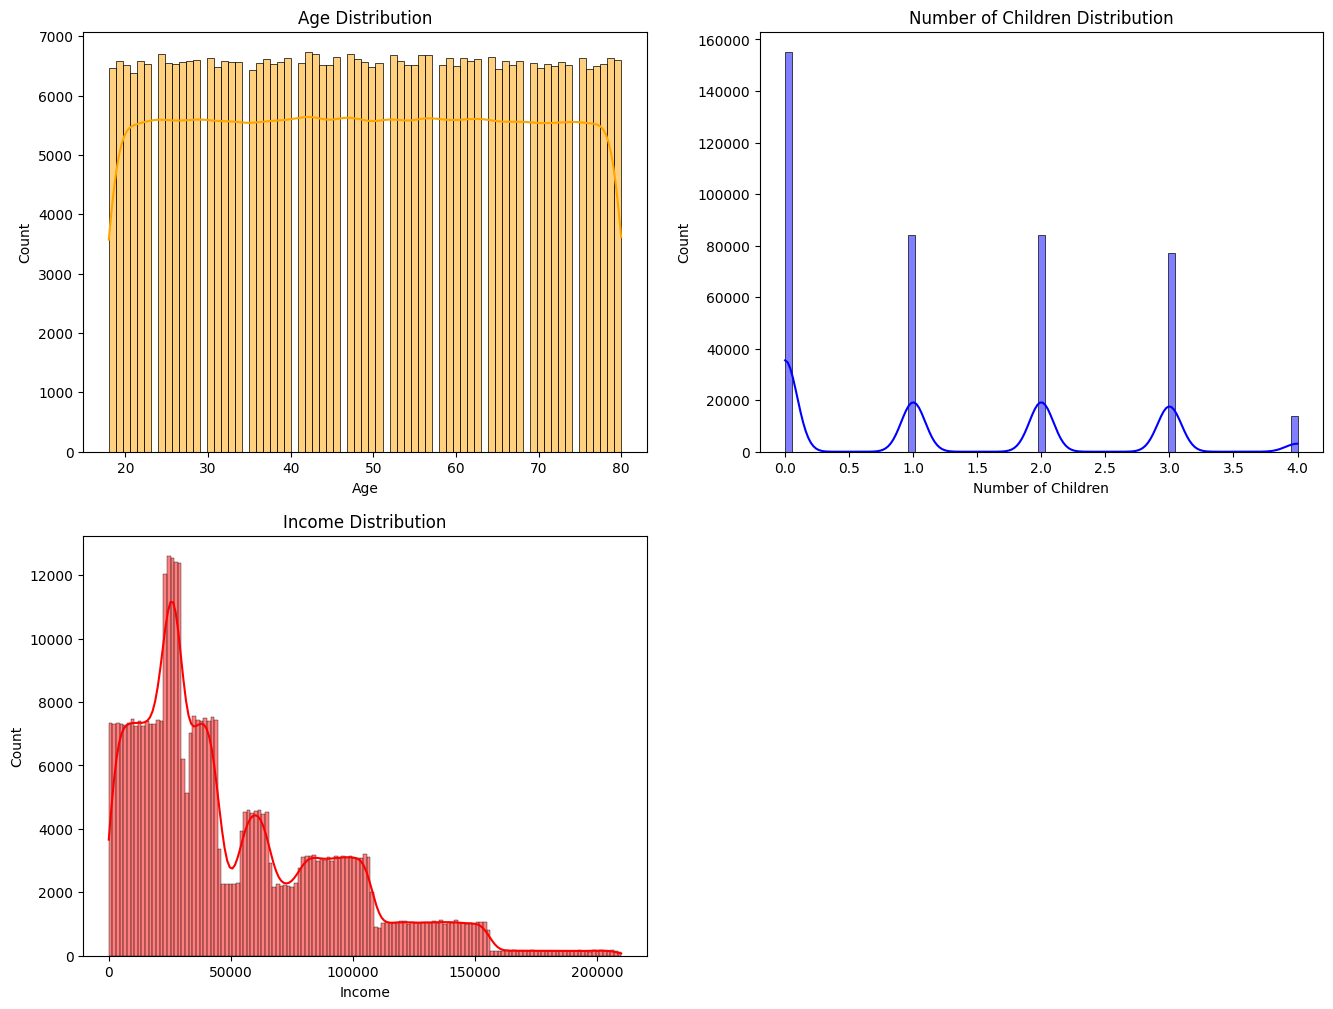

In [75]:
# Histogram distribution of numerical variables
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.histplot(data=df_numerical, x='Age', multiple='stack', color='orange', kde=True)
plt.title('Age Distribution')

plt.subplot(2,2,2)
sns.histplot(data=df_numerical, x='Number of Children', multiple='stack', color='blue', kde=True)
plt.title('Number of Children Distribution')

plt.subplot(2,2,3)
sns.histplot(data=df_numerical, x='Income', multiple='stack', color='red', kde=True)
plt.title('Income Distribution')

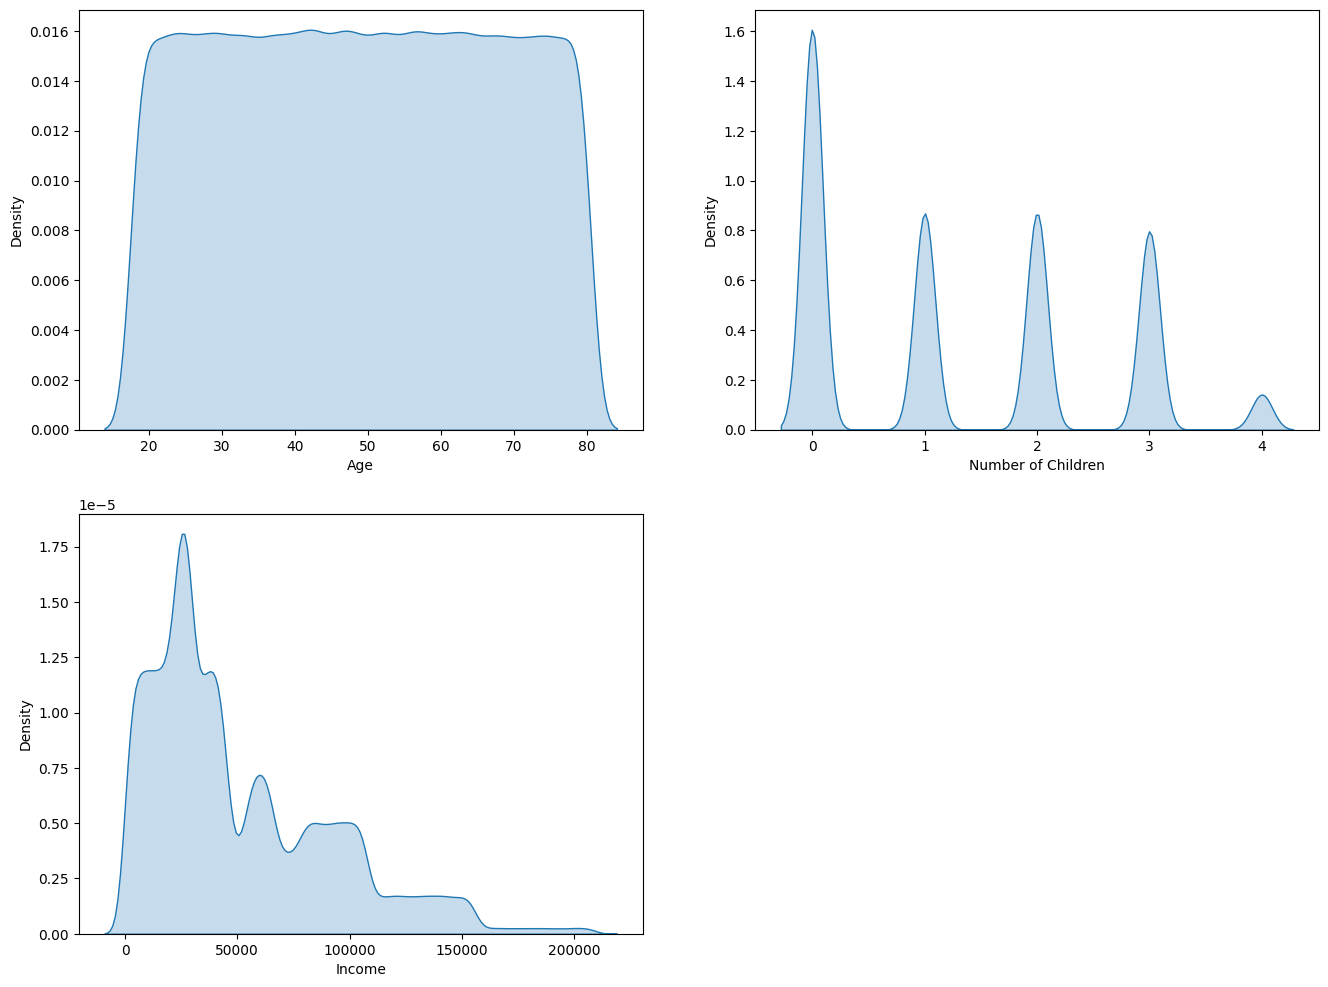

In [76]:
# Density of numerical variables
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.kdeplot(df_numerical['Age'], fill = True);

plt.subplot(2,2,2)
sns.kdeplot(df_numerical['Number of Children'], fill = True);

plt.subplot(2,2,3)
sns.kdeplot(df_numerical['Income'], fill = True);

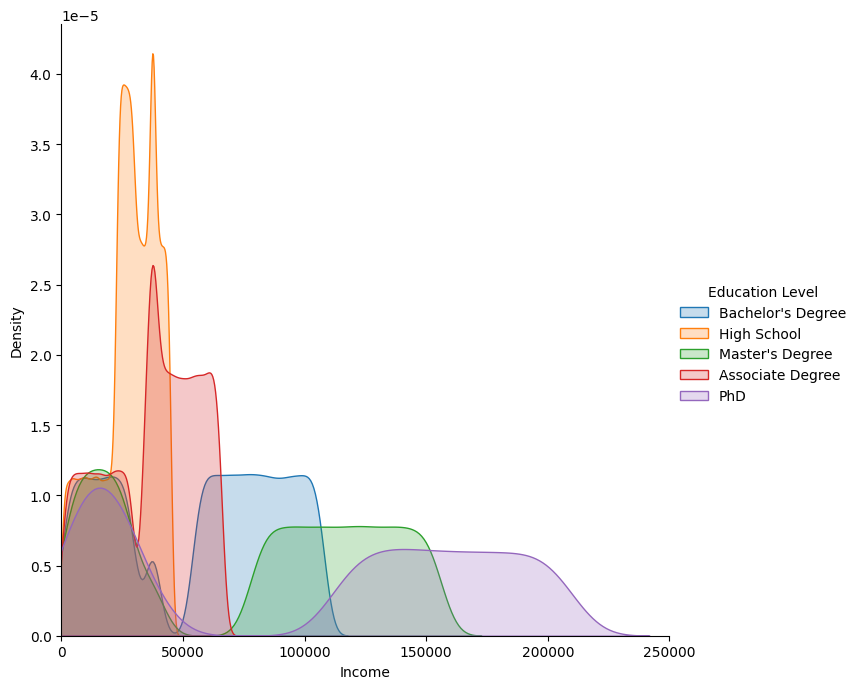

In [77]:
# Income density distribution by education levels
sns.FacetGrid(data = data,
              hue = "Education Level",
              height = 7,
              xlim = (0, 250000)).map(sns.kdeplot, "Income", fill = True).add_legend();

In [78]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [79]:
# Effects of education levels and employment status on income
data_em = df.groupby(['Education Level', 'Employment Status'])['Income'].mean().reset_index()
data_em

,Education Level,Employment Status,Income
0,Associate Degree,Employed,49456.695810
1,Associate Degree,Unemployed,15068.171176
2,Bachelor's Degree,Employed,80988.859968
3,Bachelor's Degree,Unemployed,15051.235088
4,High School,Employed,33743.376760
5,High School,Unemployed,15046.873131
6,Master's Degree,Employed,116877.224875
7,Master's Degree,Unemployed,14957.836281
8,PhD,Employed,160405.381394
9,PhD,Unemployed,14946.667647


<Axes: xlabel='Education Level', ylabel='Income'>

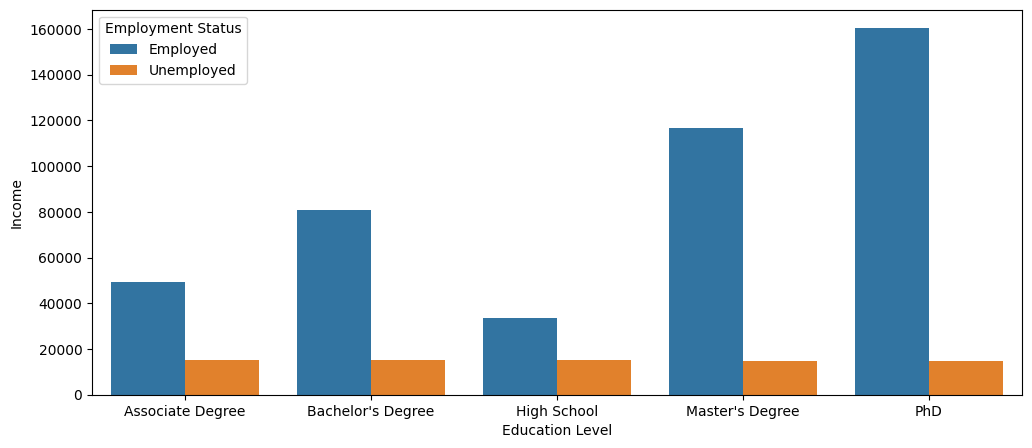

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(data_em, x='Education Level', y='Income', hue='Employment Status')

In [81]:
# Effect of activity level and dietary habits on depression
data_al = df.groupby('Physical Activity Level')['Dietary Habits'].value_counts().reset_index()
data_al

,Physical Activity Level,Dietary Habits,count
0,Active,Moderate,33228
1,Active,Unhealthy,24550
2,Active,Healthy,21127
3,Moderate,Moderate,67728
4,Moderate,Healthy,48305
5,Moderate,Unhealthy,41980
6,Sedentary,Unhealthy,104287
7,Sedentary,Moderate,69490
8,Sedentary,Healthy,3073


<Axes: xlabel='Physical Activity Level', ylabel='count'>

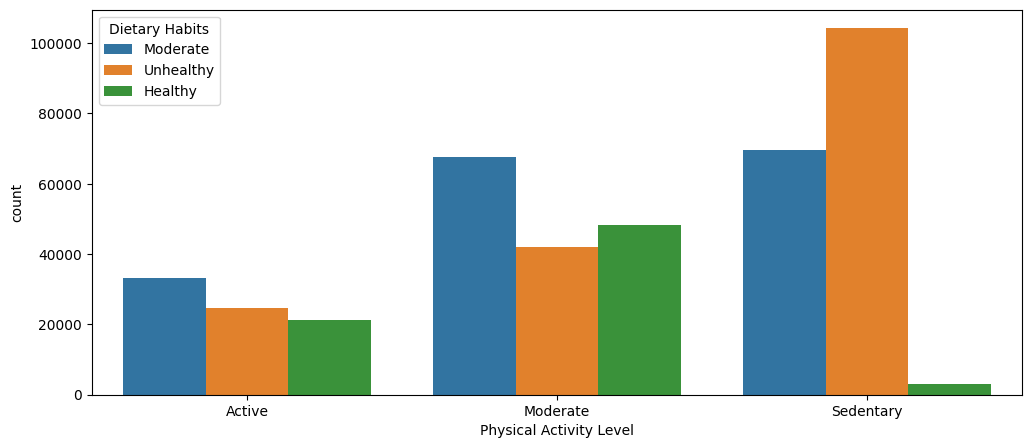

In [82]:
plt.figure(figsize=(12,5))
sns.barplot(data=data_al, x='Physical Activity Level', y='count', hue='Dietary Habits')

<Axes: xlabel='Education Level', ylabel='Income'>

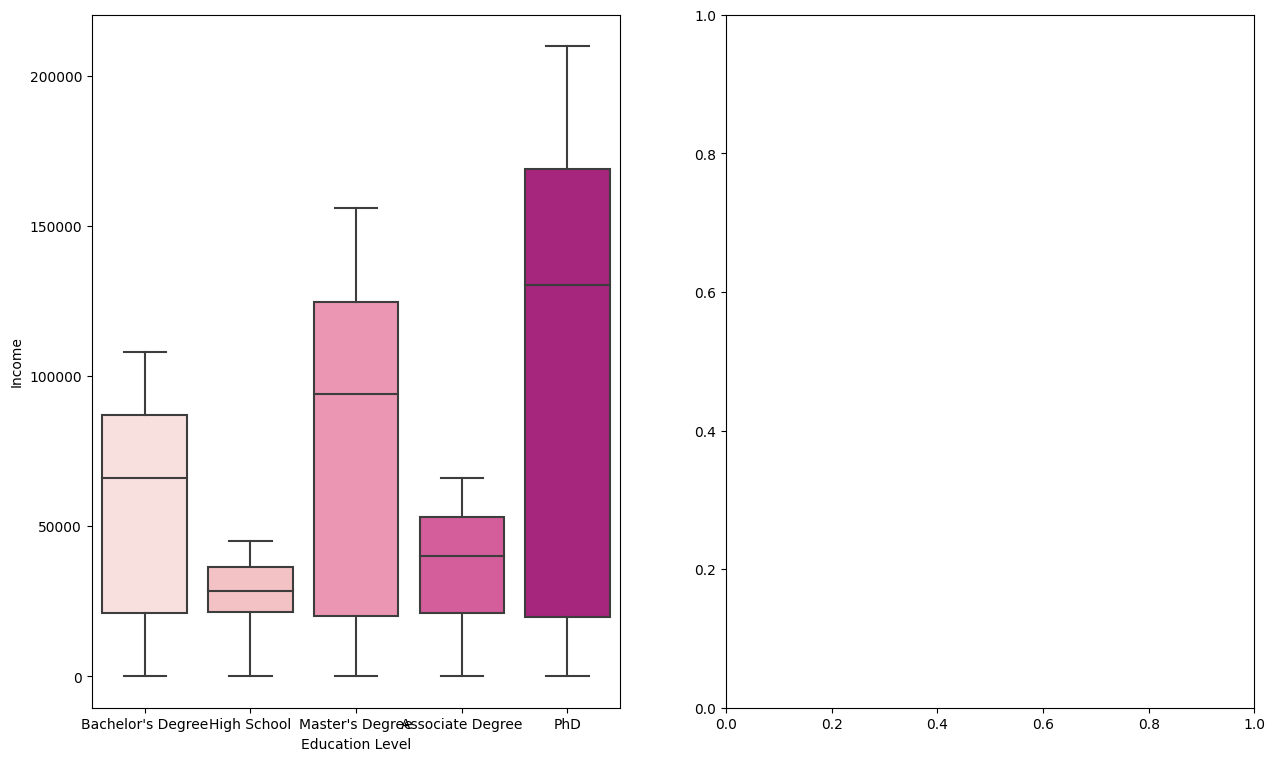

In [83]:
fig,ax=plt.subplots(1,2,figsize=(15,9))
sns.boxplot(data=df,x="Education Level",y="Income",ax=ax[0],palette=sns.color_palette(palette='RdPu'))